In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection

In [3]:
from utilities import visualize_classifier

# Input file containing data

In [4]:
input_file = 'data_multivar_nb.txt'

# Load data from input file

In [5]:
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1] 

# Create Naive Bayes classifier 

In [6]:
classifier = GaussianNB()

# Train the classifier

In [7]:
classifier.fit(X, y)

,priors,None
,var_smoothing,1e-09


# Predict the values for training data

In [8]:
y_pred = classifier.predict(X)

# Compute accuracy

In [9]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier = 99.75 %


# Visualize the performance of the classifier

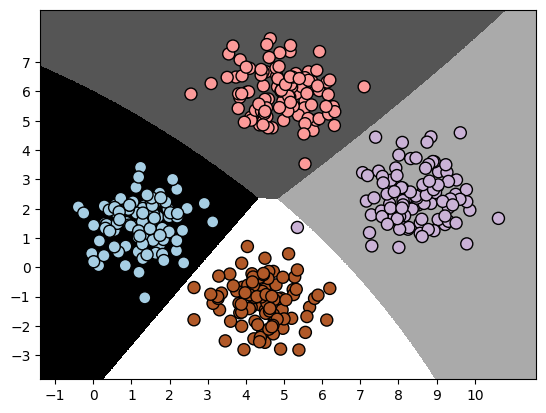

In [10]:
visualize_classifier(classifier, X, y)

# Cross validation

## Split data into training and test data 

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

## compute accuracy of the classifier

In [12]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

Accuracy of the new classifier = 100.0 %


## Visualize the performance of the classifier

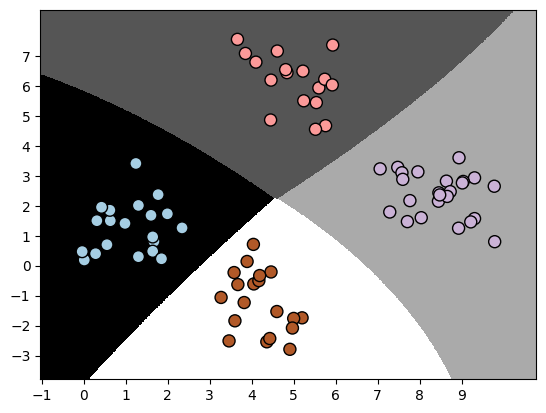

In [13]:
visualize_classifier(classifier_new, X_test, y_test)

# Scoring functions

In [14]:
num_folds = 3

In [15]:
accuracy_values = model_selection.cross_val_score(classifier, 
        X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

Accuracy: 99.75%


In [16]:
precision_values = model_selection.cross_val_score(classifier, 
        X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

Precision: 99.76%


In [17]:
recall_values = model_selection.cross_val_score(classifier, 
        X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

Recall: 99.75%


In [18]:
f1_values = model_selection.cross_val_score(classifier, 
        X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

F1: 99.75%
